# Perparing Data for training the model

In [321]:
import numpy as np
import pandas as pd

In [323]:
solar = pd.read_csv("solarEnergyGenerated2.csv")

In [325]:
solar.head()

,name,id,address,date,kWh,public_url,installationDate,uid
0,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 08:00:00 AM,1.130,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 08:00:00
1,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 09:00:00 AM,2.340,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 09:00:00
2,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 10:00:00 AM,3.656,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 10:00:00
3,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 11:00:00 AM,4.577,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 11:00:00
4,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2017/09/11 12:00:00 PM,6.506,https://monitoring.solaredge.com/solaredge-web...,2016/11/07,3141062017-09-11 12:00:00


In [327]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258423 entries, 0 to 258422
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              258423 non-null  object 
 1   id                258423 non-null  int64  
 2   address           258423 non-null  object 
 3   date              258423 non-null  object 
 4   kWh               258423 non-null  float64
 5   public_url        258423 non-null  object 
 6   installationDate  258423 non-null  object 
 7   uid               258423 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.8+ MB


In [329]:
# converting the date column from object to the datetime

solar['date'] = pd.to_datetime(solar['date'])

In [330]:
# Seperating date and time and removing this current date column

solar['time'] = solar['date'].dt.time

In [331]:
solar['date'] = solar['date'].dt.date

In [334]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258423 entries, 0 to 258422
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              258423 non-null  object 
 1   id                258423 non-null  int64  
 2   address           258423 non-null  object 
 3   date              258423 non-null  object 
 4   kWh               258423 non-null  float64
 5   public_url        258423 non-null  object 
 6   installationDate  258423 non-null  object 
 7   uid               258423 non-null  object 
 8   time              258423 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 17.7+ MB


In [337]:
# after seperation date is again in object type lets convert it again

solar['date'] = pd.to_datetime(solar['date'])

In [339]:
solar.sample()

,name,id,address,date,kWh,public_url,installationDate,uid,time
56732,Richmond - Knob Hill Community Hall,332785,2433 26 AV SW,2018-09-11,3.293,https://monitoringpublic.solaredge.com/solared...,2016/11/21,3327852018-09-11 16:00:00,16:00:00


In [341]:
# here some columns are not usefull for us so lets remove them

# id
# address
# public_url
# uid               :- removing

solar = solar[['name', 'date', 'time', 'installationDate', 'kWh']]

In [343]:
solar.head()

,name,date,time,installationDate,kWh
0,Calgary Fire Hall Headquarters,2017-09-11,08:00:00,2016/11/07,1.130
1,Calgary Fire Hall Headquarters,2017-09-11,09:00:00,2016/11/07,2.340
2,Calgary Fire Hall Headquarters,2017-09-11,10:00:00,2016/11/07,3.656
3,Calgary Fire Hall Headquarters,2017-09-11,11:00:00,2016/11/07,4.577
4,Calgary Fire Hall Headquarters,2017-09-11,12:00:00,2016/11/07,6.506


In [345]:
solar['installationDate'] = pd.to_datetime(solar['installationDate'])

In [347]:
solar = solar[solar['date'] > '2017-12-31']

In [349]:
solar

,name,date,time,installationDate,kWh
314,Southland Leisure Centre,2021-08-22,07:00:00,2015-09-01,1.812
315,Southland Leisure Centre,2021-08-22,08:00:00,2015-09-01,14.595
316,Southland Leisure Centre,2021-08-22,10:00:00,2015-09-01,82.237
317,Southland Leisure Centre,2021-08-22,11:00:00,2015-09-01,98.787
318,Southland Leisure Centre,2021-08-22,12:00:00,2015-09-01,114.381
...,...,...,...,...,...
258418,Bearspaw Water Treatment Plant,2023-03-12,15:00:00,2017-10-31,201.285
258419,Bearspaw Water Treatment Plant,2023-03-12,16:00:00,2017-10-31,162.582
258420,Bearspaw Water Treatment Plant,2023-03-12,17:00:00,2017-10-31,107.060
258421,Bearspaw Water Treatment Plant,2023-03-12,18:00:00,2017-10-31,43.074


In [351]:
# now we don't need installation date also so lets drop that also

solar = solar.drop(columns='installationDate')

In [353]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221704 entries, 314 to 258422
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   name    221704 non-null  object        
 1   date    221704 non-null  datetime64[ns]
 2   time    221704 non-null  object        
 3   kWh     221704 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 8.5+ MB


In [355]:
# making time column to datetime dtype
solar['time'] = pd.to_datetime(solar['time'], format='%H:%M:%S', errors='coerce').dt.time


In [357]:
# sorting data by date and time
solar = solar.sort_values(by=['date', 'time'], ascending=[True, True])


In [359]:
solar

,name,date,time,kWh
49636,Bearspaw Water Treatment Plant,2018-01-01,00:00:00,1.317
49637,Bearspaw Water Treatment Plant,2018-01-01,01:00:00,1.324
49638,Bearspaw Water Treatment Plant,2018-01-01,02:00:00,1.331
49639,Bearspaw Water Treatment Plant,2018-01-01,03:00:00,1.361
49640,Bearspaw Water Treatment Plant,2018-01-01,04:00:00,1.386
...,...,...,...,...
254641,City of Calgary North Corporate Warehouse,2023-03-16,19:00:00,0.896
254653,Richmond - Knob Hill Community Hall,2023-03-16,19:00:00,0.114
254666,CFD Firehall #7,2023-03-16,19:00:00,0.259
254679,Manchester Building M,2023-03-16,19:00:00,0.203


In [361]:
data = solar

# storing this solar dataset  in data for other uses

In [363]:
# now lets set the date column as DataFrame's index

solar = solar.set_index('date')

In [365]:
solar.head(5)

,name,time,kWh
date,,,
2018-01-01,Bearspaw Water Treatment Plant,00:00:00,1.317
2018-01-01,Bearspaw Water Treatment Plant,01:00:00,1.324
2018-01-01,Bearspaw Water Treatment Plant,02:00:00,1.331
2018-01-01,Bearspaw Water Treatment Plant,03:00:00,1.361
2018-01-01,Bearspaw Water Treatment Plant,04:00:00,1.386


In [367]:
solar['kWh'].describe()

count    221704.00000
mean         38.29259
std          73.26185
min           0.00000
25%           1.36100
50%           7.96200
75%          33.68175
max         514.46200
Name: kWh, dtype: float64

In [369]:
solar.isnull().sum()

name    0
time    0
kWh     0
dtype: int64

In [371]:
# we have no missing values in our dataset

solar.shape

(221704, 3)

## Moving ahead for machine learning dataset

In [374]:
data

,name,date,time,kWh
49636,Bearspaw Water Treatment Plant,2018-01-01,00:00:00,1.317
49637,Bearspaw Water Treatment Plant,2018-01-01,01:00:00,1.324
49638,Bearspaw Water Treatment Plant,2018-01-01,02:00:00,1.331
49639,Bearspaw Water Treatment Plant,2018-01-01,03:00:00,1.361
49640,Bearspaw Water Treatment Plant,2018-01-01,04:00:00,1.386
...,...,...,...,...
254641,City of Calgary North Corporate Warehouse,2023-03-16,19:00:00,0.896
254653,Richmond - Knob Hill Community Hall,2023-03-16,19:00:00,0.114
254666,CFD Firehall #7,2023-03-16,19:00:00,0.259
254679,Manchester Building M,2023-03-16,19:00:00,0.203


In [376]:
data = data.drop(columns = 'name')

In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221704 entries, 49636 to 254692
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    221704 non-null  datetime64[ns]
 1   time    221704 non-null  object        
 2   kWh     221704 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.8+ MB


In [380]:
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S', errors='coerce').dt.time


In [382]:
data

,date,time,kWh
49636,2018-01-01,00:00:00,1.317
49637,2018-01-01,01:00:00,1.324
49638,2018-01-01,02:00:00,1.331
49639,2018-01-01,03:00:00,1.361
49640,2018-01-01,04:00:00,1.386
...,...,...,...
254641,2023-03-16,19:00:00,0.896
254653,2023-03-16,19:00:00,0.114
254666,2023-03-16,19:00:00,0.259
254679,2023-03-16,19:00:00,0.203


In [384]:
# since we have different org which are calculating solar energy therefore we have multiple rows for same time lets add the kWh for the same time

solar_grouped = data.groupby(['date', 'time'], as_index=False)['kWh'].sum()
solar_grouped = solar_grouped.sort_values(by=['date', 'time']).reset_index(drop=True)


In [491]:
data = solar_grouped

In [493]:
data = data.set_index('date')

In [495]:
data

,time,kWh
date,,
2018-01-01,00:00:00,1.317
2018-01-01,01:00:00,1.324
2018-01-01,02:00:00,1.331
2018-01-01,03:00:00,1.361
2018-01-01,04:00:00,1.386
...,...,...
2023-03-16,15:00:00,437.999
2023-03-16,16:00:00,361.639
2023-03-16,17:00:00,238.556


In [497]:
# creating hour columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24849 entries, 2018-01-01 to 2023-03-16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    24849 non-null  object 
 1   kWh     24849 non-null  float64
dtypes: float64(1), object(1)
memory usage: 582.4+ KB


In [499]:
# Convert to string first, then extract

data['hours'] = data['time'].apply(lambda x: float(x.hour) if hasattr(x, 'hour') else float(str(x).split(':')[0]))

In [501]:
data

,time,kWh,hours
date,,,
2018-01-01,00:00:00,1.317,0.0
2018-01-01,01:00:00,1.324,1.0
2018-01-01,02:00:00,1.331,2.0
2018-01-01,03:00:00,1.361,3.0
2018-01-01,04:00:00,1.386,4.0
...,...,...,...
2023-03-16,15:00:00,437.999,15.0
2023-03-16,16:00:00,361.639,16.0
2023-03-16,17:00:00,238.556,17.0


In [505]:
# creating month and year column

# Month column (1=January, 12=December)
data['month'] = data.index.month

# Year column
data['year'] = data.index.year

# Check first 10 rows
data.head(10)


,time,kWh,hours,month,year
date,,,,,
2018-01-01,00:00:00,1.317,0.0,1,2018
2018-01-01,01:00:00,1.324,1.0,1,2018
2018-01-01,02:00:00,1.331,2.0,1,2018
2018-01-01,03:00:00,1.361,3.0,1,2018
2018-01-01,04:00:00,1.386,4.0,1,2018
2018-01-01,05:00:00,1.388,5.0,1,2018
2018-01-01,06:00:00,1.383,6.0,1,2018
2018-01-01,07:00:00,1.374,7.0,1,2018
2018-01-01,08:00:00,1.372,8.0,1,2018


In [507]:
# Day of the year column 
data['dayofyear'] = data.index.dayofyear


In [509]:
data

,time,kWh,hours,month,year,dayofyear
date,,,,,,
2018-01-01,00:00:00,1.317,0.0,1,2018,1
2018-01-01,01:00:00,1.324,1.0,1,2018,1
2018-01-01,02:00:00,1.331,2.0,1,2018,1
2018-01-01,03:00:00,1.361,3.0,1,2018,1
2018-01-01,04:00:00,1.386,4.0,1,2018,1
...,...,...,...,...,...,...
2023-03-16,15:00:00,437.999,15.0,3,2023,75
2023-03-16,16:00:00,361.639,16.0,3,2023,75
2023-03-16,17:00:00,238.556,17.0,3,2023,75


In [511]:
data = data.drop(columns = 'time')

In [513]:
data

,kWh,hours,month,year,dayofyear
date,,,,,
2018-01-01,1.317,0.0,1,2018,1
2018-01-01,1.324,1.0,1,2018,1
2018-01-01,1.331,2.0,1,2018,1
2018-01-01,1.361,3.0,1,2018,1
2018-01-01,1.386,4.0,1,2018,1
...,...,...,...,...,...
2023-03-16,437.999,15.0,3,2023,75
2023-03-16,361.639,16.0,3,2023,75
2023-03-16,238.556,17.0,3,2023,75


In [519]:
# creating new column timeofday 

# Define function to categorize hour
def time_of_day(hour):
    if 6 < hour <= 10:
        return 'Morning'
    elif 10 < hour <= 16:
        return 'Afternoon'
    elif 16 < hour <= 20:
        return 'Evening'
    else:
        return 'Night'

# Apply to hours column
data['timeofday'] = data['hours'].apply(time_of_day)

In [525]:
# creating season column

def get_season(month):
    if month in [3, 4, 5, 6]:
        return 'Summer'
    elif month in [7, 8, 9, 10]:
        return 'Monsoon'
    else:  # 11, 12, 1, 2
        return 'Winter'

data['season'] = data['month'].apply(get_season)

In [527]:
data

,kWh,hours,month,year,dayofyear,timeofday,season
date,,,,,,,
2018-01-01,1.317,0.0,1,2018,1,Night,Winter
2018-01-01,1.324,1.0,1,2018,1,Night,Winter
2018-01-01,1.331,2.0,1,2018,1,Night,Winter
2018-01-01,1.361,3.0,1,2018,1,Night,Winter
2018-01-01,1.386,4.0,1,2018,1,Night,Winter
...,...,...,...,...,...,...,...
2023-03-16,437.999,15.0,3,2023,75,Afternoon,Summer
2023-03-16,361.639,16.0,3,2023,75,Afternoon,Summer
2023-03-16,238.556,17.0,3,2023,75,Evening,Summer


In [529]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24849 entries, 2018-01-01 to 2023-03-16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kWh        24849 non-null  float64
 1   hours      24849 non-null  float64
 2   month      24849 non-null  int32  
 3   year       24849 non-null  int32  
 4   dayofyear  24849 non-null  int32  
 5   timeofday  24849 non-null  object 
 6   season     24849 non-null  object 
dtypes: float64(2), int32(3), object(2)
memory usage: 1.2+ MB


In [531]:
data['hour'] = data['hours'].astype(int)

In [541]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24849 entries, 2018-01-01 to 2023-03-16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kWh        24849 non-null  float64
 1   month      24849 non-null  int32  
 2   year       24849 non-null  int32  
 3   dayofyear  24849 non-null  int32  
 4   timeofday  24849 non-null  object 
 5   season     24849 non-null  object 
 6   hour       24849 non-null  int32  
dtypes: float64(1), int32(4), object(2)
memory usage: 1.6+ MB


In [560]:
# creating Energylagday columns

data['Energy_lag_day'] = data['kWh'].shift(24)

# shifting by 24 hours for getting lag of previous day for same hour

In [562]:
# lag of previous week for the same hour

data['Energy_lag_week'] = data['kWh'].shift(168)

# shifting by 168 hours as 24*7 is 168 

In [564]:
# lag of previous 15 day for the same hours

data['Energy_lag_two_week'] = data['kWh'].shift(335)

# shifting by 335 hours which is about to 15days

In [566]:
# rolling mean

data['Energy_rollingmean_day'] = data['kWh'].rolling(window = 24).mean()

# taking window of 24 hours which will give us mean of previous 24 hours

In [572]:
# rolling standaer deviation

data['Energy_rollingstd_day'] = data['kWh'].rolling(window = 24).std()

C:\Users\rajni\AppData\Local\Temp\ipykernel_19076\1705788397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Energy_rollingstd_day'] = data['kWh'].rolling(window = 24).std()


In [574]:
data

,kWh,month,year,dayofyear,timeofday,season,hour,Energy_lag_day,Energy_lag_week,Energy_lag_two_week,Energy_rollingmean_day,Energy_rollingstd_day
date,,,,,,,,,,,,
2018-01-19,74.292,1,2018,19,Morning,Winter,9,0.710,9.682,1.317,139.396375,NaN
2018-01-19,207.277,1,2018,19,Morning,Winter,10,0.714,0.028,1.324,148.003167,NaN
2018-01-19,495.371,1,2018,19,Afternoon,Winter,11,0.716,0.008,1.331,168.613792,NaN
2018-01-19,693.193,1,2018,19,Afternoon,Winter,12,0.712,11.998,1.361,197.467167,NaN
2018-01-19,679.806,1,2018,19,Afternoon,Winter,13,9.162,49.886,1.386,225.410667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16,437.999,3,2023,75,Afternoon,Summer,15,265.329,443.705,114.973,247.160042,175.748099
2023-03-16,361.639,3,2023,75,Afternoon,Summer,16,99.778,310.758,6.012,258.070917,174.323151
2023-03-16,238.556,3,2023,75,Evening,Summer,17,38.178,204.069,0.034,266.420000,168.018098


In [576]:
# drop Null values 

data = data.dropna()
data.head()

,kWh,month,year,dayofyear,timeofday,season,hour,Energy_lag_day,Energy_lag_week,Energy_lag_two_week,Energy_rollingmean_day,Energy_rollingstd_day
date,,,,,,,,,,,,
2018-01-20,5.911,1,2018,20,Morning,Winter,8,3.798,0.111,0.549,119.754042,226.399580
2018-01-20,78.488,1,2018,20,Morning,Winter,9,74.292,0.110,0.547,119.928875,226.364563
2018-01-20,226.570,1,2018,20,Morning,Winter,10,207.277,0.111,0.558,120.732750,226.722219
2018-01-20,512.456,1,2018,20,Afternoon,Winter,11,495.371,0.135,0.558,121.444625,227.973044
2018-01-20,721.242,1,2018,20,Afternoon,Winter,12,693.193,9.995,0.552,122.613333,231.082256


In [589]:
data['energy_Generated'] = data['kWh']


C:\Users\rajni\AppData\Local\Temp\ipykernel_19076\94961632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['energy_Generated'] = data['kWh']


In [593]:
# arrangin the columns in specific order

column_order = [
    'hour', 'month', 'dayofyear', 'year',
    'timeofday', 'season',
    'energy_Generated', 
    'Energy_lag_day', 'Energy_lag_week',
    'Energy_lag_two_week', 'Energy_rollingmean_day',
    'Energy_rollingstd_day'
]

data = data[column_order]

In [595]:
data.head()

,hour,month,dayofyear,year,timeofday,season,energy_Generated,Energy_lag_day,Energy_lag_week,Energy_lag_two_week,Energy_rollingmean_day,Energy_rollingstd_day
date,,,,,,,,,,,,
2018-01-20,8,1,20,2018,Morning,Winter,5.911,3.798,0.111,0.549,119.754042,226.399580
2018-01-20,9,1,20,2018,Morning,Winter,78.488,74.292,0.110,0.547,119.928875,226.364563
2018-01-20,10,1,20,2018,Morning,Winter,226.570,207.277,0.111,0.558,120.732750,226.722219
2018-01-20,11,1,20,2018,Afternoon,Winter,512.456,495.371,0.135,0.558,121.444625,227.973044
2018-01-20,12,1,20,2018,Afternoon,Winter,721.242,693.193,9.995,0.552,122.613333,231.082256


## Data Visualization

In [587]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

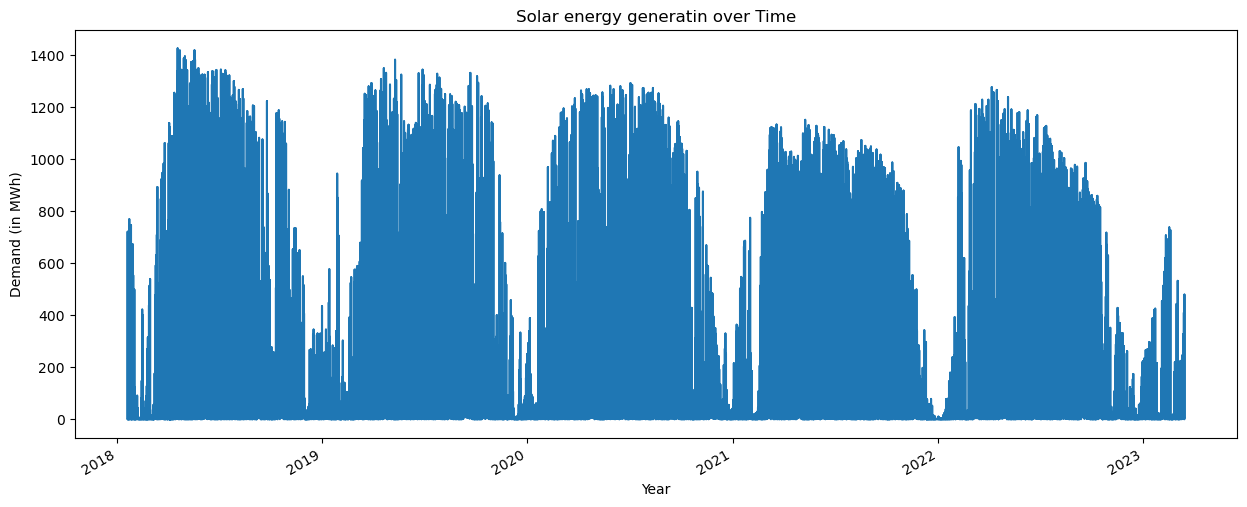

In [597]:
# plotting solar energy generation over time

data['energy_Generated'].plot(figsize = (15,6), title = 'Solar energy generatin over Time')
plt.xlabel('Year')
plt.ylabel('Demand (in MWh)')
plt.show()

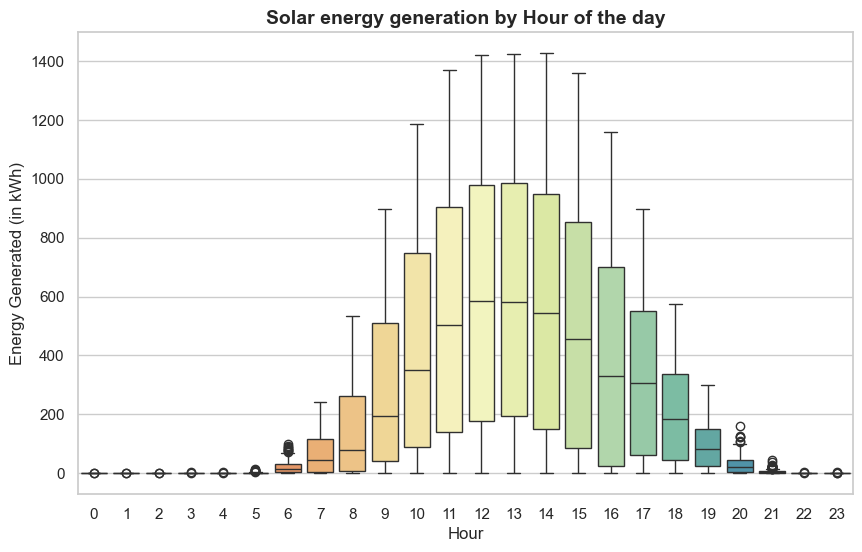

In [605]:
# plotting energy generation by hours of the day using box plot

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # activates a clean, modern theme

sns.boxplot(
    data=data,
    x='hour',
    y='energy_Generated',
    hue='hour',            # use same variable as x
    palette='Spectral',
    legend=False 
)

plt.title("Solar energy generation by Hour of the day", fontsize=14, weight='bold')
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Energy Generated (in kWh)", fontsize=12)
plt.show()


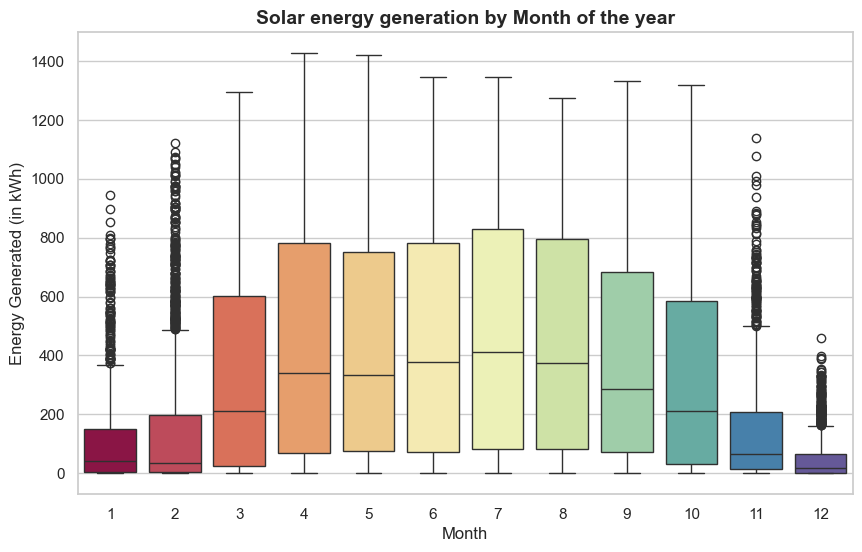

In [603]:
# plotting energy generation by month of the year using box plot

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # activates a clean, modern theme

sns.boxplot(
    data=data,
    x='month',
    y='energy_Generated',
    hue='month',            # use same variable as x
    palette='Spectral',
    legend=False 
)

plt.title("Solar energy generation by Month of the year", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Energy Generated (in kWh)", fontsize=12)
plt.show()


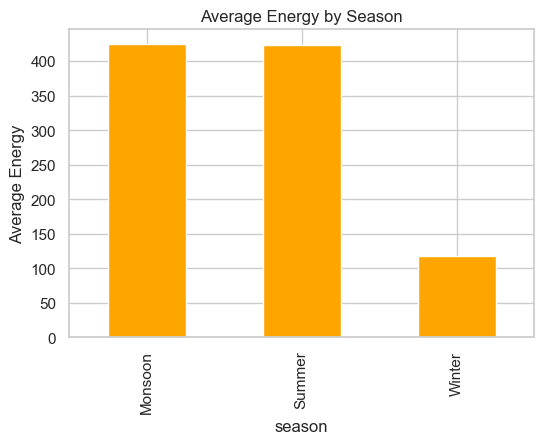

In [621]:
# seasonal bar plot with avg energy generation

season_avg = data.groupby('season')['energy_Generated'].mean().sort_values(ascending=False)
season_avg.plot(kind='bar', color='orange', figsize=(6,4), title='Average Energy by Season')
plt.ylabel('Average Energy')
plt.show()


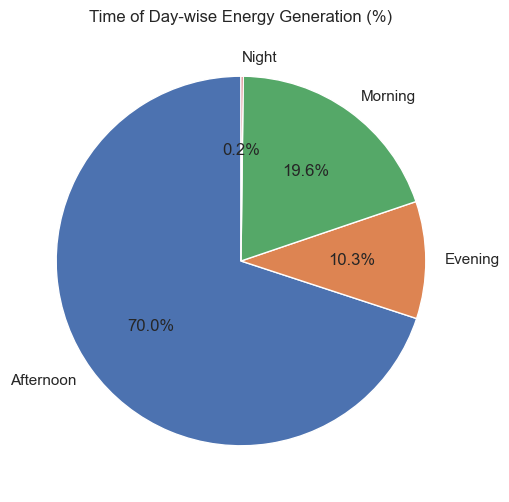

In [626]:
# Aggregate total energy generated per time of day


timeofday_energy = data.groupby('timeofday')['energy_Generated'].sum()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(timeofday_energy, labels=timeofday_energy.index, autopct='%1.1f%%', startangle=90)
plt.title('Time of Day-wise Energy Generation (%)')
plt.show()


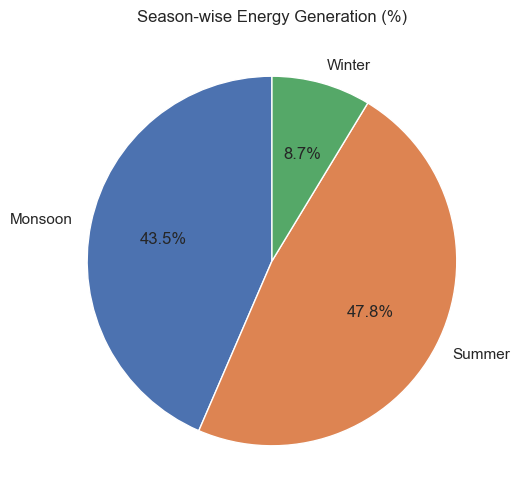

In [628]:
# Aggregate total energy generated per season


season_energy = data.groupby('season')['energy_Generated'].sum()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(season_energy, labels=season_energy.index, autopct='%1.1f%%', startangle=90)
plt.title('Season-wise Energy Generation (%)')
plt.show()


### Now lets covert categorical columns to nurical columns so that they can be use in the forecasting

`Season:` 
- Summer : 1
- Monsoon : 2
- Winter : 0

`timeofday:`
- Night : 0
- Morning : 1
- Afternoon : 2
- Evening : 3

In [638]:
# Season mapping
season_map = {
    'Winter': 0,
    'Summer': 1,
    'Monsoon': 2
}
data['season_num'] = data['season'].map(season_map)

# Time of day mapping
timeofday_map = {
    'Night': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3
}
data['timeofday_num'] = data['timeofday'].map(timeofday_map)

# Check few rows
print(data[['season', 'season_num', 'timeofday', 'timeofday_num']].sample(5))


             season  season_num  timeofday  timeofday_num
date                                                     
2018-09-02  Monsoon           2  Afternoon              2
2019-04-30   Summer           1  Afternoon              2
2022-10-12  Monsoon           2    Morning              1
2023-03-01   Summer           1  Afternoon              2
2022-05-26   Summer           1  Afternoon              2


In [640]:
ndata = data.drop(columns = ['season', 'timeofday'])

In [644]:
odata = data.drop(columns = ['season_num', 'timeofday_num'])

In [646]:
data =  ndata.rename(columns={
    'timeofday_num': 'timeofday',
    'season_num': 'Season'
})

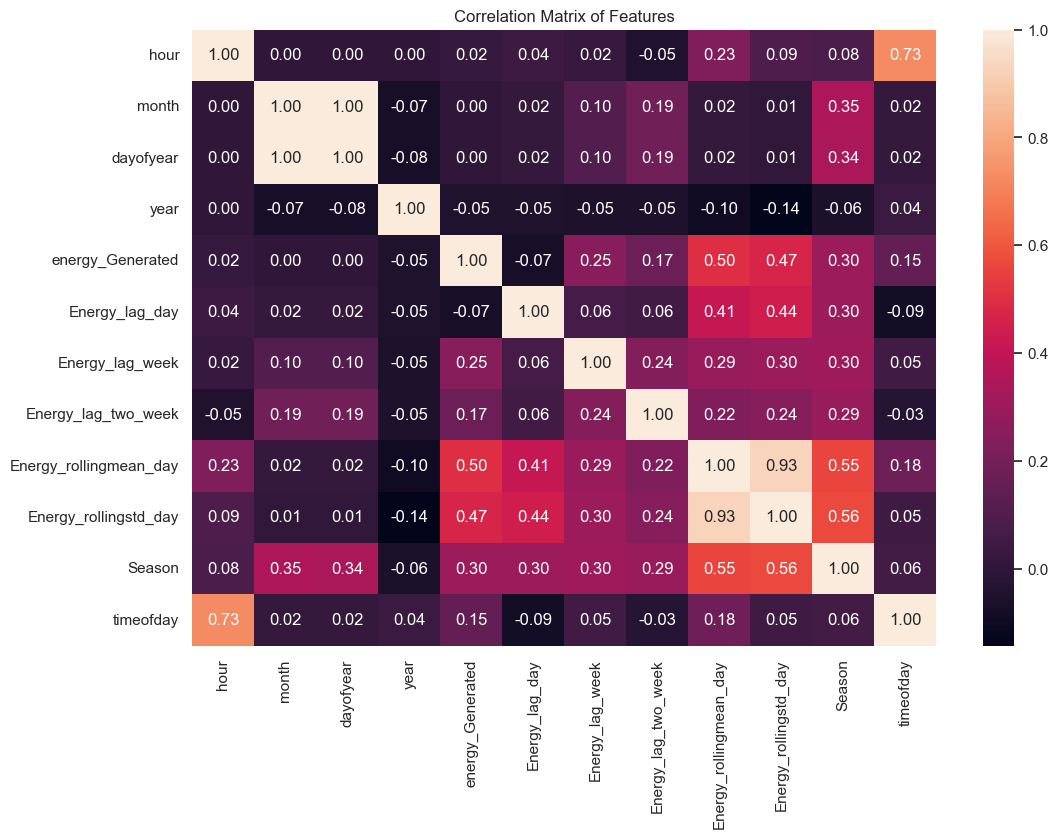

In [652]:
# Correlation Matrix and Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True, fmt=".2f") # anoot=True : to show the numbers , fmt : to adjust decimals
plt.title("Correlation Matrix of Features")
plt.show()

# Machine Learning part:- Model Buildup and training

In [655]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [657]:
# we have more than 5 years of data from 1 jan 2018 to  march 2023
# we will use first 80% data for training and next 20% for testing
# spliting from 31 dec 2023 for getting first 4 years in training data and next 1 year in testing

split_date = '2021-12-31'  
train = data.loc[data.index <= split_date]
test = data.loc[data.index > split_date]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (19038, 12)
Test shape: (5453, 12)


In [659]:
# splitting training data to dependent and independent feature

X_train = train.drop('energy_Generated', axis=1)
y_train = train['energy_Generated']

# energy_Generated col is target feature and rest all are independent features

In [661]:
# splitting testing data to dependent and independent feature

X_test = test.drop('energy_Generated', axis=1)
y_test = test['energy_Generated']


In [665]:
print(len(X_train), len(X_test))
print(X_train.index.intersection(X_test.index))

# no overlapping data test and train both are ok

19038 5453
DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)


## Model training using RandomForest

In [667]:
rf_model = RandomForestRegressor(
    n_estimators=200,       # number of trees
    max_depth=12,           # limit to prevent overfitting
    random_state=42,        # reproducibility
    n_jobs=-1               # use all CPU cores
)

# training the random forest model
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [669]:
# rf_model is trained Now lets do prediction for the test data

y_pred = rf_model.predict(X_test)

In [671]:
y_pred

array([  1.95797814,   2.09016514,   1.84626981, ..., 175.372994  ,
        86.96164132,  19.58079012])

In [673]:
y_test

date
2022-01-01      0.026
2022-01-01      0.189
2022-01-01      0.257
2022-01-01      0.074
2022-01-02      0.001
               ...   
2023-03-16    437.999
2023-03-16    361.639
2023-03-16    238.556
2023-03-16     97.388
2023-03-16      8.213
Name: energy_Generated, Length: 5453, dtype: float64

In [675]:
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 93.04
RMSE: 149.03
R²: 0.805


In [677]:
y_train_pred = rf_model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {mae:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Train RMSE: {rmse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Train R²: {train_r2:.3f}")
print(f"Test R²: {r2:.3f}")


Train MAE: 93.04
Test MAE: 93.04
Train RMSE: 149.03
Test RMSE: 149.03
Train R²: 0.866
Test R²: 0.805


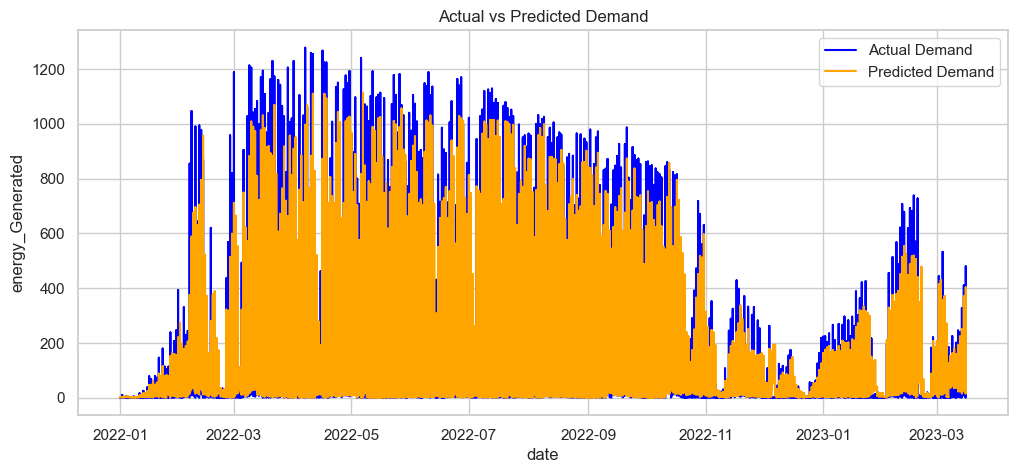

In [679]:
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual Demand', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Demand', color='orange')
plt.legend()
plt.title('Actual vs Predicted Demand')
plt.xlabel('date')
plt.ylabel('energy_Generated')
plt.show()


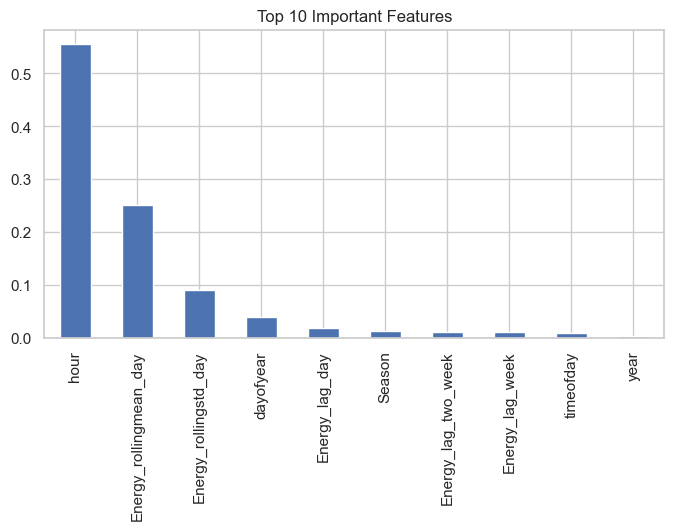

In [687]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,4))
plt.title('Top 10 Important Features')
plt.show()


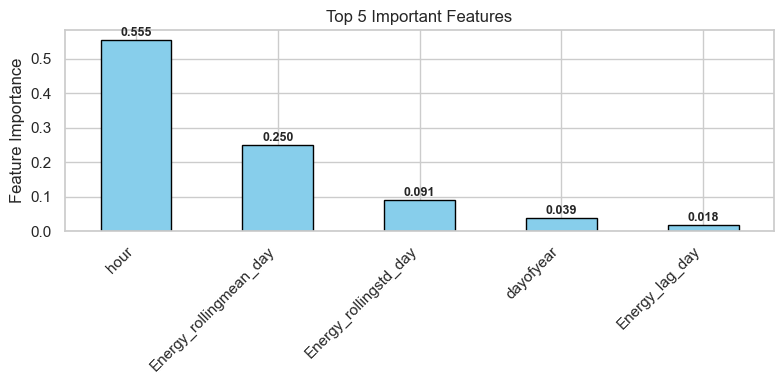

In [683]:
# plotting feature importances 
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 4))
bars = top_features.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 5 Important Features')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45, ha='right')

# Adding numeric notation on every bar for knowing its value
for i, value in enumerate(top_features):
    plt.text(i, value + 0.002, f"{value:.3f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


## Model training using XGBoost

In [691]:
from xgboost import XGBRegressor


In [693]:
# initialize the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,      
    max_depth=12,          
    learning_rate=0.05,    
    subsample=0.8,         
    colsample_bytree=0.8,  
    random_state=42,       
    n_jobs=-1              
)

In [699]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

### Performance metric for XGBoost

In [701]:
y_predXG = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_predXG)
rmse = np.sqrt(mean_squared_error(y_test, y_predXG))
r2 = r2_score(y_test, y_predXG)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 93.04
RMSE: 149.03
R²: 0.805


### Performance metric for RandomForest

In [707]:
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 93.04
RMSE: 149.03
R²: 0.805
